In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
shop = yf.Ticker("SHOP.TO")
shop_df = shop.history(period='max')
shop_df = shop_df.drop(columns=["Dividends", "Stock Splits"])
shop_df = shop_df.loc['2015':'2020']
shop_df["SHOP Returns"] = shop_df["Close"].pct_change()
shop_df = shop_df[["SHOP Returns"]]

enb = yf.Ticker("ENB.TO")
enb_df = enb.history(period='max')
enb_df = enb_df.drop(columns=["Dividends", "Stock Splits"])
enb_df = enb_df.loc['2015':'2020']
enb_df = enb_df.dropna()
enb_df.rename(columns = {"Close": "ENB Close"},  inplace = True)
enb_df["ENB Returns"] = enb_df["ENB Close"].pct_change()
enb_df = enb_df[["ENB Returns"]]

gold = yf.Ticker("ABX.TO")
gold_df = gold.history(period='max')
gold_df = gold_df.drop(columns=["Dividends", "Stock Splits"])
gold_df = gold_df.loc['2015':'2020']
gold_df = gold_df.dropna()
gold_df.rename(columns = {"Close": "Bar Close"},  inplace = True)
gold_df["BAR Returns"] = gold_df["Bar Close"].pct_change()
gold_df = gold_df[["BAR Returns"]]

rbc = yf.Ticker("RY.TO")
rbc_df = rbc.history(period='max')
rbc_df = rbc_df.drop(columns=["Dividends", "Stock Splits"])
rbc_df = rbc_df.loc['2015':'2020']
rbc_df.rename(columns = {"Close": "RBC Close"},  inplace = True)
rbc_df["RBC Returns"] = rbc_df["RBC Close"].pct_change()
rbc_df = rbc_df[["RBC Returns"]]

tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2020']
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df["TSX Returns"] = tsx_df[["TSX Close"]].pct_change()
tsx_df = tsx_df[["TSX Returns"]]

In [14]:
port_df = pd.concat([shop_df, enb_df, gold_df, rbc_df, tsx_df], axis=1, join="inner")
port_df = port_df.dropna()

In [15]:
port_df.head()

,SHOP Returns,ENB Returns,BAR Returns,RBC Returns,TSX Returns
Date,,,,,
2015-05-22,0.118080,-0.010691,-0.005267,0.000374,-0.000184
2015-05-25,0.066400,-0.020806,0.000662,-0.001120,-0.000881
2015-05-26,-0.009125,-0.003130,-0.037037,-0.009214,-0.008994
2015-05-27,-0.065547,-0.002313,0.005656,0.004650,0.003967
2015-05-28,-0.014493,0.001822,0.023320,0.001376,-0.000232


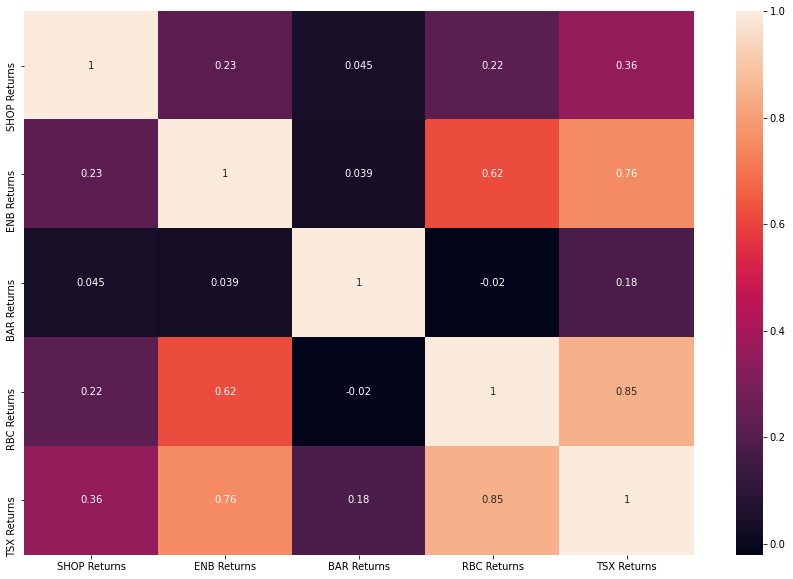

In [16]:
corrmat = port_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()